PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


c:\Users\supakron\OneDrive - Chitralada Technology Institute\Desktop\pro com\project final\Final-project-kong\climate-project-app\climate-project-app\src\Python\candex.py:245: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1'] = shp_1.area
c:\Users\supakron\OneDrive - Chitralada Technology Institute\Desktop\pro com\project final\Final-project-kong\climate-project-app\climate-project-app\src\Python\candex.py:249: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area


     idx1  idx2
0       0   394
1       0   412
2       0   392
3       0   393
4       0   410
..    ...   ...
783    76   392
784    76   393
785    76   409
786    76   410
787    76   411

[788 rows x 2 columns]


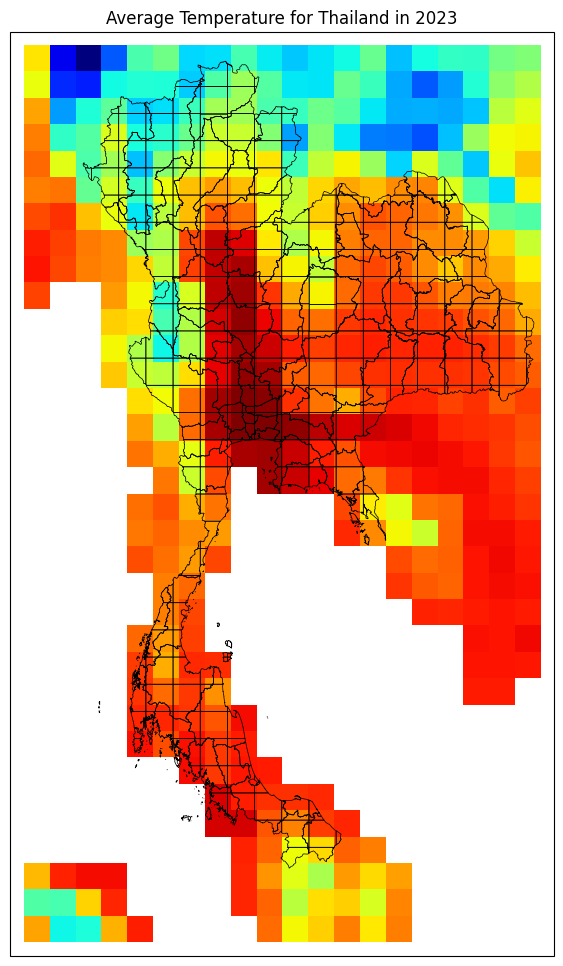

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from shapely.geometry import box
from dbfread import DBF
import candex

# โหลดข้อมูล NetCDF และจัดการข้อมูล
if __name__ == '__main__':
    ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
    data_var = ds.metpy.parse_cf('tmp')

    # แปลงคอลัมน์ 'time' ให้เป็นวันที่
    ds['time'] = pd.to_datetime(ds['time'].values)
    data_filtered = ds.sel(time=slice('2022-01-01', '2023-12-31'))

    # สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 12), subplot_kw={'projection': ccrs.PlateCarree()})
    year = 2023
    temp = data_filtered.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
    data_avg = temp['tmp'].mean(dim='time')
    x = temp.lon
    y = temp.lat
    ax = axs
    mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower')
    
    # ตั้งค่าแสดงผลของพิกัดในประเทศไทย
    ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())
    plt.title('Average Temperature for Thailand in ' + str(year), fontsize=12)

    # โหลด shapefiles
    shp_target = gpd.read_file('../shapefile/gadm41_THA_1.shp')
    shp_source = gpd.read_file('../shapefile/ThailandGrid.shp')
    shp_source = shp_source.set_crs("EPSG:4326")

    # คำนวณการตัดกัน (intersection) ระหว่าง shapefiles
    shp_int = candex.intersection_shp(shp_target, shp_source)
    shp_int = shp_int[['geometry']]

    # วาดขอบเขตของ shapefile
    shp_int.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

    # # ตั้งค่า gridlines และ color bar
    # gl = ax.gridlines(draw_labels=True, alpha=0.1)
    # gl.top_labels = False
    # gl.right_labels = False
    # cbar = fig.colorbar(mp, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1, shrink=0.3)
    # cbar.set_label('Temperature (°C)')

    

    plt.show()


In [20]:
# cell 1: read candex function and load the paraemters
from climate import *
import matplotlib
import numpy as np
import geopandas as gpd



# cell 2: specifiying the parameter for creating the source shapefile
# name of the sample nc file (give only one if there are separaete file for each year or month)
name_of_nc = '../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc'
# sample varibale from nc file (similar to all the dimensions for all the varibales with intend to read)
name_of_variable = 'tmp' 
# name of varibale in nc file (and not dimension) that holed the longituge values
name_of_lon_var = 'lon' 
# name of varibale in nc file (and not dimension) that holds the latitiute values
name_of_lat_var = 'lat'
# bounding box the trim the created shepefile
# it should be in form of np.array([min_lat,max_lat,min_lon,max_lon]) 
# or should be give False if there is not box
box_values =  np.array([5,21,97,106]) # or False;
# if the nc file lon is 0 to 360 and want to transfor to -180 to 180
# in the case the box_value should be in either of east or west hemisphere
correct_360 = False
# name of the shapefile that is created and saved
name_of_shp = '../shapefile/ThailandGrid.shp' 
# creating the shapefile and preparing the 2D lat/lon field based on shapefile for indexing
lat_2D, lon_2D = candex.NetCDF_SHP_lat_lon(name_of_nc, name_of_variable, name_of_lat_var,
                                            name_of_lon_var, name_of_shp, box_values, correct_360)

# cell 3: plotting the created shapefile
shp_source = gpd.read_file('../shapefile/ThailandGrid.shp') # load it
print(shp_source.head()) # show the first 5 rows
# plotting
# shp_source.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 0.25, figsize=(20,20))
# matplotlib.pyplot.xlabel('Lon')
# matplotlib.pyplot.ylabel('Lat')
# matplotlib.pyplot.show()

case 1 - regular lat/lon
360 720
   ID_s  lat_s  lon_s                                           geometry
0   1.0   5.25  97.25  POLYGON ((97.25 5, 97.5 5, 97.5 5.25, 97.5 5.5...
1   2.0   5.25  97.75  POLYGON ((97.75 5, 98 5, 98 5.25, 98 5.5, 97.7...
2   3.0   5.25  98.25  POLYGON ((98.25 5, 98.5 5, 98.5 5.25, 98.5 5.5...
3   4.0   5.25  98.75  POLYGON ((98.75 5, 99 5, 99 5.25, 99 5.5, 98.7...
4   5.0   5.25  99.25  POLYGON ((99.25 5, 99.5 5, 99.5 5.25, 99.5 5.5...


In [21]:
# Load the .dbf file and convert to DataFrame
remap_df = pd.DataFrame(iter(DBF('../shapefile/ThailandGrid.dbf')))

# สมมติว่า lat_2D และ lon_2D เป็นข้อมูล 2D array ของละติจูดและลองจิจูดในไฟล์ .nc
# คำนวณตำแหน่ง rows และ cols ของ source lat/lon ในไฟล์ .nc
rows, cols = candex.lat_lon_to_index(np.array(remap_df['lat_s']),
                                     np.array(remap_df['lon_s']),
                                     lat_2D,
                                     lon_2D)

# เพิ่มคอลัมน์ 'rows' และ 'cols' ลงใน remap_df
remap_df['rows'] = rows
remap_df['cols'] = cols

# บันทึก remap_df เป็น CSV สำหรับการใช้งานในอนาคต
# remap_df.to_csv('../shapefile/remap-ThailandGrid.csv', index=False)

In [22]:
# # remapping
# # remap csv
# remap_df = pd.read_csv('../shapefile/remap-ThailandGrid.csv')

# # element of nc file

# nc_names = '../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc' # if there are multiple nc file can be pecify by *
# output_path = '../dataset-nc/remap-test' # the path 
# name_of_var_time = 'time' # dimension of time in the source nc files
# name_of_vars = ['tmp'] #varibale that need to be remapped
# # format of the varibales
# format_of_vars = ['f4','f4'] # type of the varibale that need to be remapped f4 single, f8 double, int, integer
# fill_values = ['-9999.00','-9999.00'] # Fill values for each varibale
# authour_name = 'Supakron sukphithak test-1' # the authour

# # candex target_nc_creation functions
# candex.target_nc_creation(nc_names,
#                    remap_df,
#                    name_of_var_time,
#                    output_path,
#                    name_of_vars,
#                    format_of_vars,
#                    fill_values,
#                    authour_name)




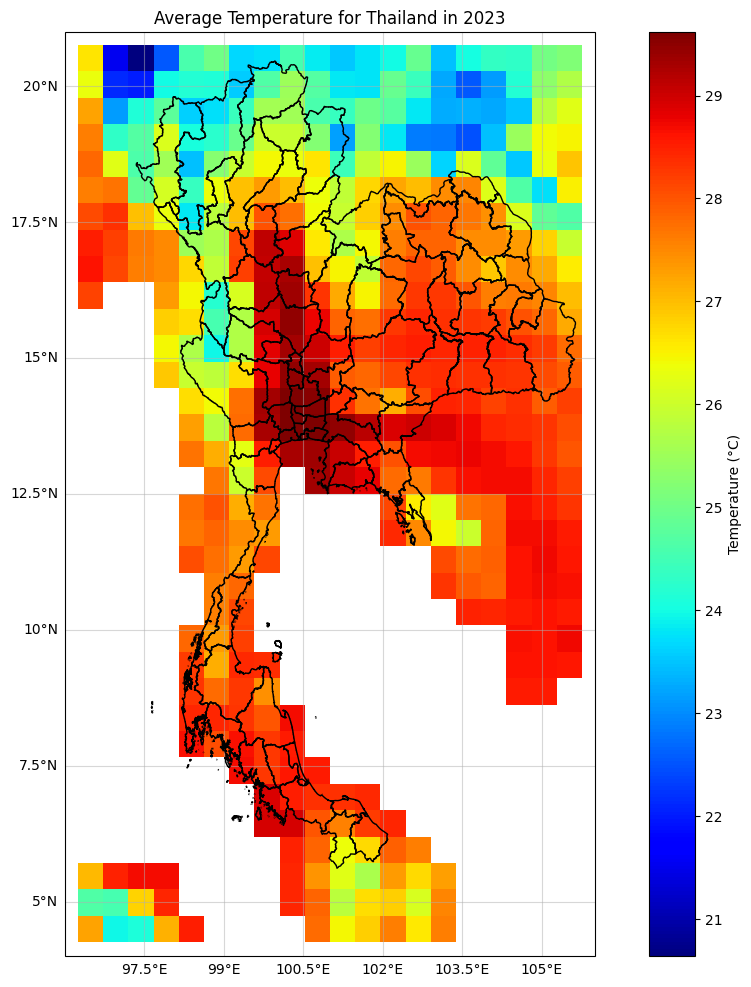

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import xarray as xr
import cartopy.crs as ccrs

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')
data_var = ds.metpy.parse_cf('tmp')

# แปลงคอลัมน์ 'time' ให้เป็นวันที่
ds['time'] = pd.to_datetime(ds['time'].values)
data_filtered = ds.sel(time=slice('2022-01-01', '2023-12-31'))

# สร้าง plot และตั้งค่าพารามิเตอร์พื้นฐาน
fig, ax = plt.subplots(figsize=(14, 12), subplot_kw={'projection': ccrs.PlateCarree()})
year = 2023
#temp = data_filtered.sel
temp = data_filtered.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))
data_avg = temp['tmp'].mean(dim='time')

x = temp.lon
y = temp.lat

# แสดงอุณหภูมิ
mp = ax.imshow(data_avg, extent=(x.min(), x.max(), y.min(), y.max()), cmap='jet', origin='lower', interpolation='none')

# ตั้งค่าแสดงผลของพิกัดในประเทศไทย
ax.set_extent([96, 106, 4, 21], crs=ccrs.PlateCarree())

# เพิ่ม gridlines ให้ชัดเจนขึ้น
gl = ax.gridlines(draw_labels=True, alpha=0.5)  # ความโปร่งใสของเส้นกริด
gl.top_labels = False
gl.right_labels = False

# วาดขอบเขตของประเทศไทย
gdf = gpd.read_file("../Geo-data/shapefile-lv1-thailand.json")
gdf.geometry.boundary.plot(ax=ax, color='black', linewidth=1)  # ความหนาของเส้น boundary


plt.title('Average Temperature for Thailand in ' + str(year), fontsize=12)
plt.colorbar(mp, label='Temperature (°C)')

# แสดงผล
plt.show()




In [42]:
import xarray as xr
import json

# โหลดข้อมูล NetCDF
ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# เลือกข้อมูลอุณหภูมิและช่วงเวลา
year = 2001
temp = ds.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# คำนวณค่าเฉลี่ยอุณหภูมิต่อกริด
data_avg = temp['tmp'].mean(dim='time')

# สร้าง DataFrame จากข้อมูล NetCDF
lon, lat = data_avg.lon.values, data_avg.lat.values
temp_values = data_avg.values
#print(temp_values)

# ฟังก์ชันสำหรับสร้าง Polygon จากพิกัดกลางของกริด
def create_grid_polygon(lon_center, lat_center, lon_step, lat_step):
    return [
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างซ้าย
        [float(lon_center + lon_step / 2), float(lat_center - lat_step / 2)],  # มุมล่างขวา
        [float(lon_center + lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนขวา
        [float(lon_center - lon_step / 2), float(lat_center + lat_step / 2)],  # มุมบนซ้าย
        [float(lon_center - lon_step / 2), float(lat_center - lat_step / 2)]   # ปิดกรอบ
    ]

# คำนวณระยะห่างระหว่างพิกัด (step)
lon_step = float(lon[1] - lon[0])
lat_step = float(lat[1] - lat[0])


# เตรียมข้อมูลในรูปแบบ JSON
features = []
for i, lon_value in enumerate(lon):
    for j, lat_value in enumerate(lat):
        temperature = temp_values[j, i]
        if not pd.isnull(temperature):  # ตรวจสอบว่าไม่มี NaN
            grid_polygon = create_grid_polygon(lon_value, lat_value, lon_step, lat_step)
            features.append({
                "type": "Feature",
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [grid_polygon]
                },
                "properties": {
                    "temperature": float(temperature)  # แปลง float32 เป็น float
                }
            })
            print(grid_polygon)

# สร้างโครงสร้าง GeoJSON
geojson_data = {
    "type": "FeatureCollection",
    "features": features
}

# บันทึกข้อมูลเป็นไฟล์ GeoJSON
output_file = "../Geo-data/nc_to_json_2001.json"
with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(geojson_data, f, ensure_ascii=False, indent=4)

print(f"ข้อมูลถูกบันทึกในไฟล์ {output_file}")





[[96.0, 4.0], [96.5, 4.0], [96.5, 4.5], [96.0, 4.5], [96.0, 4.0]]
[[96.0, 4.5], [96.5, 4.5], [96.5, 5.0], [96.0, 5.0], [96.0, 4.5]]
[[96.0, 5.0], [96.5, 5.0], [96.5, 5.5], [96.0, 5.5], [96.0, 5.0]]
[[96.0, 16.0], [96.5, 16.0], [96.5, 16.5], [96.0, 16.5], [96.0, 16.0]]
[[96.0, 16.5], [96.5, 16.5], [96.5, 17.0], [96.0, 17.0], [96.0, 16.5]]
[[96.0, 17.0], [96.5, 17.0], [96.5, 17.5], [96.0, 17.5], [96.0, 17.0]]
[[96.0, 17.5], [96.5, 17.5], [96.5, 18.0], [96.0, 18.0], [96.0, 17.5]]
[[96.0, 18.0], [96.5, 18.0], [96.5, 18.5], [96.0, 18.5], [96.0, 18.0]]
[[96.0, 18.5], [96.5, 18.5], [96.5, 19.0], [96.0, 19.0], [96.0, 18.5]]
[[96.0, 19.0], [96.5, 19.0], [96.5, 19.5], [96.0, 19.5], [96.0, 19.0]]
[[96.0, 19.5], [96.5, 19.5], [96.5, 20.0], [96.0, 20.0], [96.0, 19.5]]
[[96.0, 20.0], [96.5, 20.0], [96.5, 20.5], [96.0, 20.5], [96.0, 20.0]]
[[96.0, 20.5], [96.5, 20.5], [96.5, 21.0], [96.0, 21.0], [96.0, 20.5]]
[[96.5, 4.0], [97.0, 4.0], [97.0, 4.5], [96.5, 4.5], [96.5, 4.0]]
[[96.5, 4.5], [97.0, 4.5],

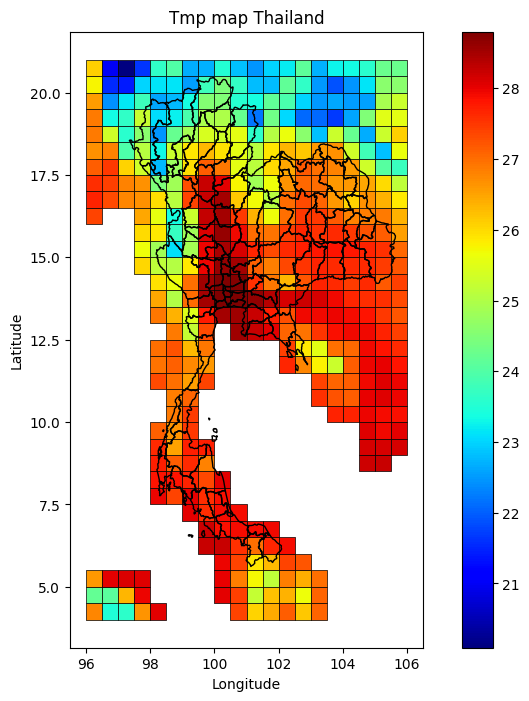

In [35]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2001.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# สร้าง plot
fig, ax = plt.subplots(figsize=(10, 8))

# แสดงผลข้อมูลพื้นที่ด้วย GeoPandas
data.plot(column='temperature', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

shapefile.geometry.boundary.plot(ax=ax, color='black', linewidth=1)

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Tmp map Thailand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2000_1.json')
shapefile = gpd.read_file('../Geo-data/thailand-Geo.json')

# เลือกจังหวัดที่ต้องการ (เช่น จังหวัด "Chiang Mai")
Korat_coord = shapefile[shapefile['NAME_1'] == 'Nakhon Ratchasima']

print(f'พิกัดจังหวัดนครราชสีมา: ', Korat_coord['geometry'])

# # เลือก grid ที่อยู่ภายในขอบเขตของจังหวัด โดยใช้ predicate='within' แทน op='within'
# data_within_province = gpd.sjoin(data, selected_province, predicate='within')

# # สร้าง plot
# fig, ax = plt.subplots(figsize=(10, 8))

# # แสดง grid ของจังหวัดที่เลือกโดยใช้สีตามค่า temperature
# data_within_province.plot(column='temperature', cmap='jet', linewidth=0.5, ax=ax, edgecolor='black', legend=True)

# # แสดง boundary ของจังหวัดที่เลือก
# selected_province.geometry.boundary.plot(ax=ax, color='red', linewidth=1)

# # ปรับแต่งการแสดงผลเพิ่มเติม
# plt.title('Temperature Grid within Chiang Mai Province')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# plt.show()



พิกัดจังหวัดนครราชสีมา:  28    POLYGON ((102.32894 15.8019, 102.36571 15.7600...
Name: geometry, dtype: geometry


grid in Korat:      temperature                                           geometry
217    27.550001  POLYGON ((101 14, 101.5 14, 101.5 14.5, 101 14...
218    27.116669  POLYGON ((101 14.5, 101.5 14.5, 101.5 15, 101 ...
219    27.650000  POLYGON ((101 15, 101.5 15, 101.5 15.5, 101 15...
240    26.900000  POLYGON ((101.5 14, 102 14, 102 14.5, 101.5 14...
241    26.849997  POLYGON ((101.5 14.5, 102 14.5, 102 15, 101.5 ...
242    27.333330  POLYGON ((101.5 15, 102 15, 102 15.5, 101.5 15...
264    26.349998  POLYGON ((102 14, 102.5 14, 102.5 14.5, 102 14...
265    27.350000  POLYGON ((102 14.5, 102.5 14.5, 102.5 15, 102 ...
266    27.624998  POLYGON ((102 15, 102.5 15, 102.5 15.5, 102 15...
267    27.466667  POLYGON ((102 15.5, 102.5 15.5, 102.5 16, 102 ...
287    27.233332  POLYGON ((102.5 14, 103 14, 103 14.5, 102.5 14...
288    27.533333  POLYGON ((102.5 14.5, 103 14.5, 103 15, 102.5 ...
289    27.725000  POLYGON ((102.5 15, 103 15, 103 15.5, 102.5 15...
290    27.650000  POLYGON ((102.5

C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\3987849944.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\3987849944.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


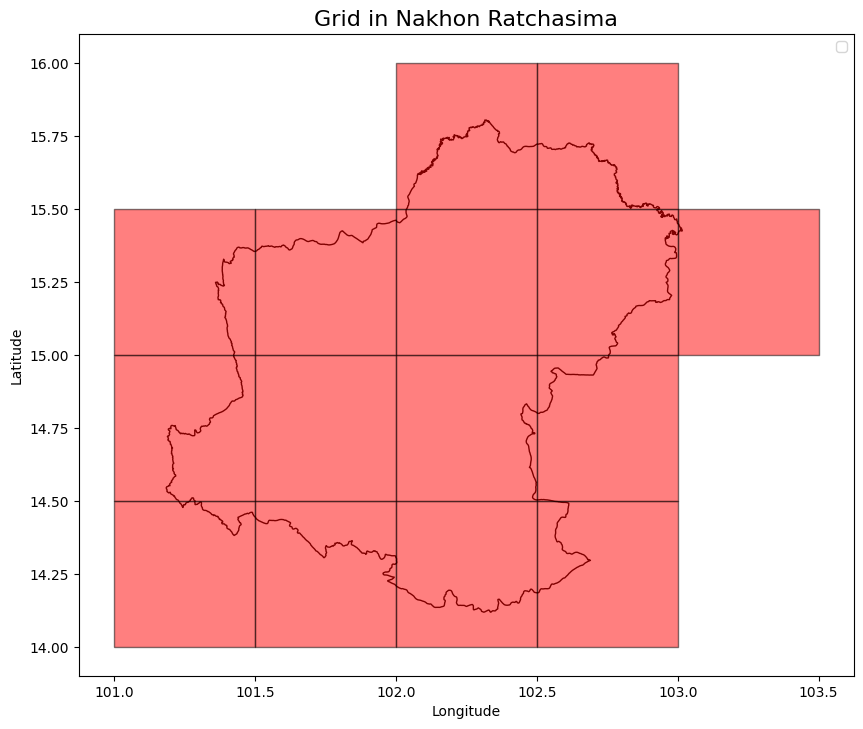

In [44]:
#หา grid ที่อยู่ในพิกัดของจังหวัดนี้
import geopandas as gpd
import matplotlib.pyplot as plt

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2001.json')
shapefile = gpd.read_file('../Geo-data/shapefile-lv1-thailand.json')

# เลือกจังหวัดที่ต้องการ (เช่น จังหวัด "Nakhon Ratchasima")
korat_coord = shapefile[shapefile['NAME_1'] == 'Nakhon Ratchasima']
#print(korat_coord)

# ตรวจสอบการตัดกันระหว่างกริดใน data กับเขตจังหวัดนครราชสีมา
# ทำการกรองเฉพาะกริดที่ตัดกับจังหวัดนครราชสีมา
#union_geometry = data.geometry
grid_in_korat = data[data.geometry.intersects(korat_coord.geometry.union_all())]
#print(union_geometry)
print("grid in Korat:",grid_in_korat)

# สร้างแผนที่
fig, ax = plt.subplots(figsize=(10, 10))

# Plot เส้นเขตจังหวัดนครราชสีมา
korat_coord.plot(ax=ax, color='white', edgecolor='black', alpha=1, label='Nakhon Ratchasima')

# Plot กริดที่ตัดกับจังหวัดนครราชสีมา
grid_in_korat.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Grid in Korat')

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Grid in Nakhon Ratchasima', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# แสดงคำอธิบาย (legend)
plt.legend()

# แสดงผลแผนที่
plt.show()


C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\35287530.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_in_korat = data[data.geometry.intersects(korat_coord.geometry.unary_union)]
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\35287530.py:30: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersection_area = grid.geometry.intersection(korat_coord.geometry.unary_union).area
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\35287530.py:54: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\35287530.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called

Grid 372: intersects 8.78%, Temp: 29.14
Grid 373: intersects 11.48%, Temp: 28.90
Grid 389: intersects 4.74%, Temp: 29.53
Grid 390: intersects 64.81%, Temp: 28.34
Grid 391: intersects 92.06%, Temp: 27.72
Grid 392: intersects 58.61%, Temp: 27.15
Grid 408: intersects 0.06%, Temp: 29.33
Grid 409: intersects 69.34%, Temp: 27.93
Grid 410: intersects 100.00%, Temp: 27.82
Grid 411: intersects 81.74%, Temp: 28.13
Grid 412: intersects 9.18%, Temp: 28.33
Grid 428: intersects 17.61%, Temp: 28.51
Grid 429: intersects 56.33%, Temp: 28.21
Grid 430: intersects 93.68%, Temp: 28.46
Grid 431: intersects 25.29%, Temp: 28.52
Grid 448: intersects 0.02%, Temp: 27.76
Grid 449: intersects 1.59%, Temp: 28.25


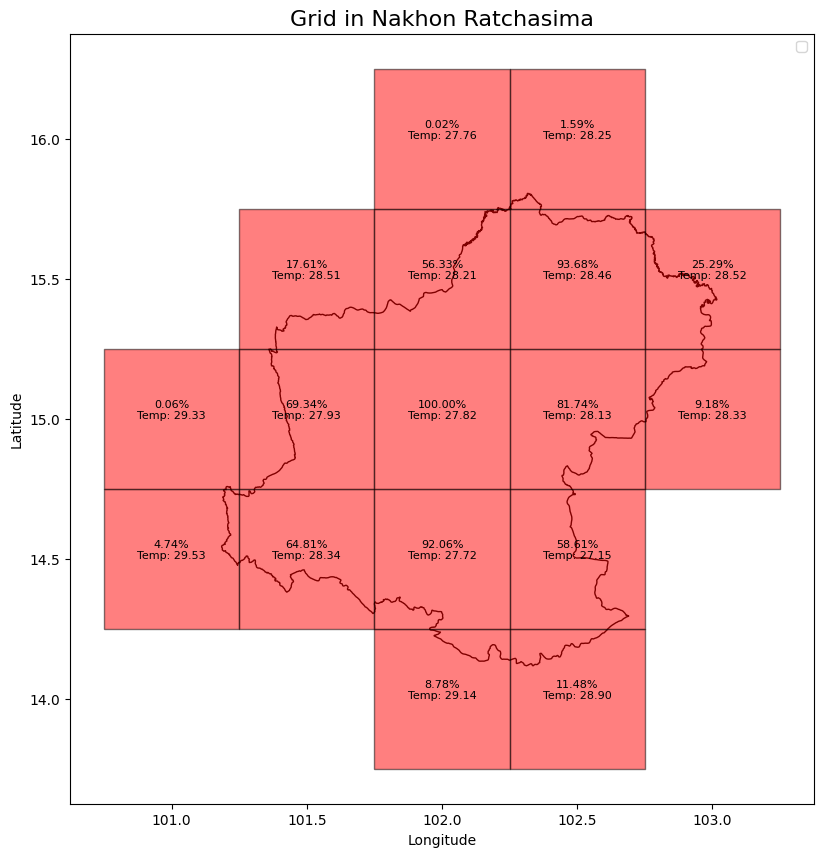

In [28]:
import geopandas as gpd
import matplotlib.pyplot as plt

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2000_1.json')
shapefile = gpd.read_file('../Geo-data/shapefile-lv1-thailand.json')

# เลือกจังหวัดที่ต้องการ (เช่น จังหวัด "Nakhon Ratchasima")
korat_coord = shapefile[shapefile['NAME_1'] == 'Nakhon Ratchasima']

# ตรวจสอบการตัดกันระหว่างกริดใน data กับเขตจังหวัดนครราชสีมา
# ทำการกรองเฉพาะกริดที่ตัดกับจังหวัดนครราชสีมา
grid_in_korat = data[data.geometry.intersects(korat_coord.geometry.unary_union)]

# สร้างแผนที่
fig, ax = plt.subplots(figsize=(10, 10))

# Plot เส้นเขตจังหวัดนครราชสีมา
korat_coord.plot(ax=ax, color='white', edgecolor='black', alpha=1, label='Nakhon Ratchasima')

# Plot กริดที่ตัดกับจังหวัดนครราชสีมา
grid_in_korat.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Grid in Korat')

# คำนวณสัดส่วนของพื้นที่กริดที่ตัดกับจังหวัดนครราชสีมา
for idx, grid in grid_in_korat.iterrows():
    # พื้นที่ของกริด
    grid_area = grid.geometry.area
    
    # พื้นที่ที่ตัดกันกับจังหวัดนครราชสีมา
    intersection_area = grid.geometry.intersection(korat_coord.geometry.unary_union).area
    
    # คำนวณสัดส่วน
    intersection_percentage = (intersection_area / grid_area) * 100
    
    # ค่า temperature ในกริด
    temperature_value = grid['temperature']
    
    
    # แสดงสัดส่วนของกริดในแผนที่
    # กำหนดตำแหน่งของข้อความบนกริด
    x, y = grid.geometry.centroid.x, grid.geometry.centroid.y
    ax.text(x, y, f'{intersection_percentage:.2f}%\nTemp: {temperature_value:.2f}', fontsize=8, ha='center', color='black')
    print(f"Grid {idx}: intersects {intersection_percentage:.2f}%, Temp: {temperature_value:.2f}")
    

# ปรับแต่งการแสดงผลเพิ่มเติม

#print(grid_in_korat)
plt.title('Grid in Nakhon Ratchasima', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# แสดงคำอธิบาย (legend)
plt.legend()

# แสดงผลแผนที่
plt.show()


C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\3388651593.py:13: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_in_korat = data[data.geometry.intersects(korat_coord.geometry.unary_union)]
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\3388651593.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  intersection_area = grid.geometry.intersection(korat_coord.geometry.unary_union).area
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\3388651593.py:66: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\supakron\AppData\Local\Temp\ipykernel_9648\3388651593.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() i

Grid 372: Weight = 0.0878, Intersects = 8.78%, Temp = 29.14
Grid 373: Weight = 0.1148, Intersects = 11.48%, Temp = 28.90
Grid 389: Weight = 0.0474, Intersects = 4.74%, Temp = 29.53
Grid 390: Weight = 0.6481, Intersects = 64.81%, Temp = 28.34
Grid 391: Weight = 0.9206, Intersects = 92.06%, Temp = 27.72
Grid 392: Weight = 0.5861, Intersects = 58.61%, Temp = 27.15
Grid 408: Weight = 0.0006, Intersects = 0.06%, Temp = 29.33
Grid 409: Weight = 0.6934, Intersects = 69.34%, Temp = 27.93
Grid 410: Weight = 1.0000, Intersects = 100.00%, Temp = 27.82
Grid 411: Weight = 0.8174, Intersects = 81.74%, Temp = 28.13
Grid 412: Weight = 0.0918, Intersects = 9.18%, Temp = 28.33
Grid 428: Weight = 0.1761, Intersects = 17.61%, Temp = 28.51
Grid 429: Weight = 0.5633, Intersects = 56.33%, Temp = 28.21
Grid 430: Weight = 0.9368, Intersects = 93.68%, Temp = 28.46
Grid 431: Weight = 0.2529, Intersects = 25.29%, Temp = 28.52
Grid 448: Weight = 0.0002, Intersects = 0.02%, Temp = 27.76
Grid 449: Weight = 0.0159, I

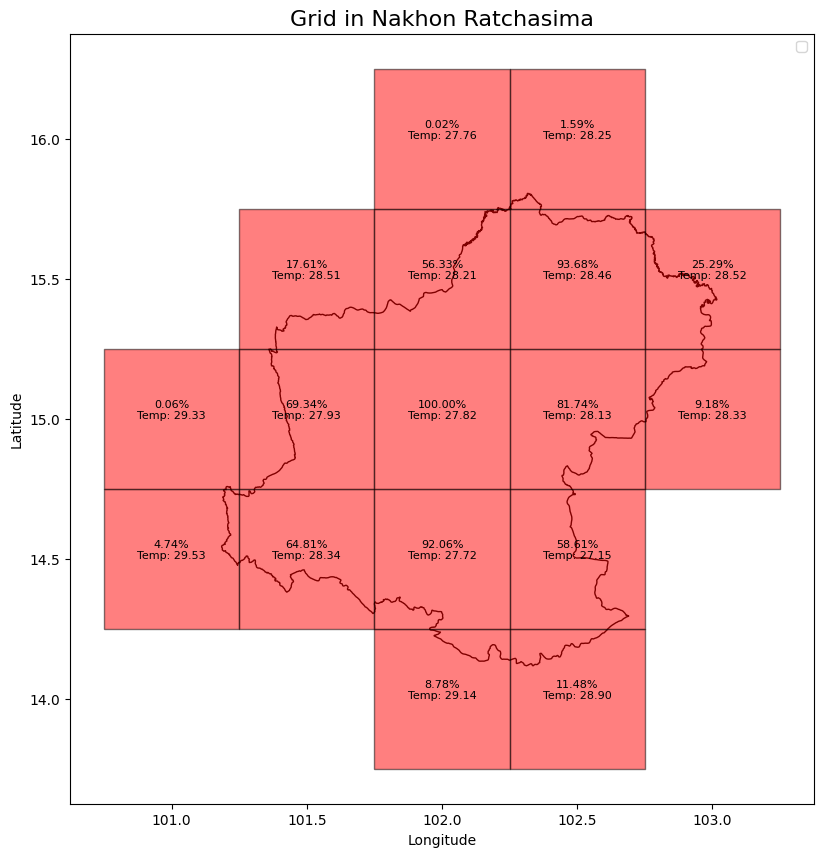

In [29]:
import geopandas as gpd
import matplotlib.pyplot as plt

# โหลดข้อมูล GeoJSON
data = gpd.read_file('../Geo-data/nc_to_json_2000_1.json')
shapefile = gpd.read_file('../Geo-data/shapefile-lv1-thailand.json')

# เลือกจังหวัดที่ต้องการ (เช่น จังหวัด "Nakhon Ratchasima")
korat_coord = shapefile[shapefile['NAME_1'] == 'Nakhon Ratchasima']

# ตรวจสอบการตัดกันระหว่างกริดใน data กับเขตจังหวัดนครราชสีมา
# ทำการกรองเฉพาะกริดที่ตัดกับจังหวัดนครราชสีมา
grid_in_korat = data[data.geometry.intersects(korat_coord.geometry.unary_union)]

# สร้างแผนที่
fig, ax = plt.subplots(figsize=(10, 10))

# Plot เส้นเขตจังหวัดนครราชสีมา
korat_coord.plot(ax=ax, color='white', edgecolor='black', alpha=1, label='Nakhon Ratchasima')

# Plot กริดที่ตัดกับจังหวัดนครราชสีมา
grid_in_korat.plot(ax=ax, color='red', edgecolor='black', alpha=0.5, label='Grid in Korat')

# คำนวณสัดส่วนของพื้นที่กริดที่ตัดกับจังหวัดนครราชสีมาและหา weighted average ของ temperature
weighted_temp_sum = 0
weight_sum = 0

for idx, grid in grid_in_korat.iterrows():
    # พื้นที่ของกริด
    grid_area = grid.geometry.area
    
    # พื้นที่ที่ตัดกันกับจังหวัดนครราชสีมา
    intersection_area = grid.geometry.intersection(korat_coord.geometry.unary_union).area
    
    # คำนวณสัดส่วน
    intersection_percentage = (intersection_area / grid_area) * 100
    weight = intersection_percentage / 100
    
    # ค่า temperature ในกริด
    temperature_value = grid['temperature']
    
    # พิมพ์น้ำหนักของกริดนี้
    print(f"Grid {idx}: Weight = {weight:.4f}, Intersects = {intersection_percentage:.2f}%, Temp = {temperature_value:.2f}")
    
    # รวมค่าที่ถ่วงน้ำหนักและน้ำหนักทั้งหมด
    weighted_temp_sum += weight * temperature_value
    weight_sum += weight
    
    # แสดงสัดส่วนของกริดและ temperature บนแผนที่
    x, y = grid.geometry.centroid.x, grid.geometry.centroid.y
    ax.text(x, y, f'{intersection_percentage:.2f}%\nTemp: {temperature_value:.2f}', fontsize=8, ha='center', color='black')

# คำนวณค่าเฉลี่ย temperature แบบถ่วงน้ำหนัก
if weight_sum > 0:
    weighted_average_temperature = weighted_temp_sum / weight_sum
    print(f"\nWeighted Average Temperature: {weighted_average_temperature:.2f}")
else:
    print("ไม่มีกริดที่ตัดกับจังหวัดนี้")

# ปรับแต่งการแสดงผลเพิ่มเติม
plt.title('Grid in Nakhon Ratchasima', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# แสดงคำอธิบาย (legend)
plt.legend()

# แสดงผลแผนที่
plt.show()


In [ ]:
# import xarray as xr
# import geopandas as gpd
# from shapely.geometry import Polygon

# # โหลดข้อมูล NetCDF
# ds = xr.open_dataset('../dataset-nc/cru_ts4.08.1901.2023.tmp.dat.nc')

# # เลือกข้อมูลช่วงปี
# year = 2023
# data_filtered = ds.sel(time=slice('2022-01-01', '2023-12-31'))
# temp = data_filtered.sel(lon=slice(96, 106), lat=slice(4, 21), time=str(year))

# # คำนวณค่าเฉลี่ยอุณหภูมิรายปี
# data_avg = temp['tmp'].mean(dim='time')

# # สร้างรายการพิกัดกริดและค่าอุณหภูมิ
# geometries = []
# values = []

# for i in range(len(data_avg.lat) - 1):
#     for j in range(len(data_avg.lon) - 1):
#         lat1, lat2 = data_avg.lat[i].item(), data_avg.lat[i + 1].item()
#         lon1, lon2 = data_avg.lon[j].item(), data_avg.lon[j + 1].item()

#         # สร้าง Polygon สำหรับแต่ละ cell
#         polygon = Polygon([(lon1, lat1), (lon1, lat2), (lon2, lat2), (lon2, lat1)])
#         geometries.append(polygon)

#         # ดึงค่าอุณหภูมิ
#         values.append(data_avg[i, j].item())

# # สร้าง GeoDataFrame
# gdf = gpd.GeoDataFrame({'temperature': values, 'geometry': geometries})

# # บันทึกเป็น GeoJSON
# output_path = "../Geo-data/average_temp_thailand_2023.json"
# gdf.to_file(output_path, driver="GeoJSON")

# print(f"GeoJSON file has been created at: {output_path}")


GeoJSON file has been created at: ../Geo-data/average_temp_thailand_2023.json


C:\Users\supakron\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
